In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data_file.csv to data_file.csv


In [ ]:
import pandas as pd

df = pd.read_csv("data_file.csv")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [ ]:
print(df.dtypes)

FileName              object
md5Hash               object
Machine                int64
DebugSize              int64
DebugRVA               int64
MajorImageVersion      int64
MajorOSVersion         int64
ExportRVA              int64
ExportSize             int64
IatVRA                 int64
MajorLinkerVersion     int64
MinorLinkerVersion     int64
NumberOfSections       int64
SizeOfStackReserve     int64
DllCharacteristics     int64
ResourceSize           int64
BitcoinAddresses       int64
Benign                 int64
dtype: object


In [ ]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [ ]:
print(df.columns)

Index(['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA',
       'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize',
       'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
       'ResourceSize', 'BitcoinAddresses', 'Benign'],
      dtype='object')


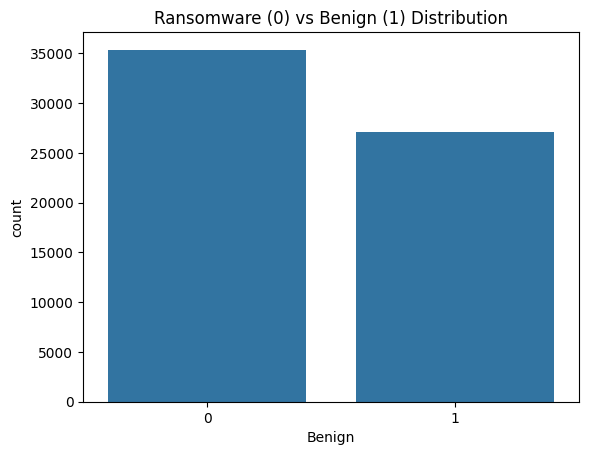

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Benign'])
plt.title("Ransomware (0) vs Benign (1) Distribution")
plt.show()

In [ ]:
df = df.drop(columns=['FileName', 'md5Hash'], errors='ignore')

df.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [ ]:
df.dtypes

,0
Machine,int64
DebugSize,int64
DebugRVA,int64
MajorImageVersion,int64
MajorOSVersion,int64
ExportRVA,int64
ExportSize,int64
IatVRA,int64
MajorLinkerVersion,int64
MinorLinkerVersion,int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df.drop(columns=['Benign'])
y = df['Benign']

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled['Benign'] = y

df_scaled.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0.007611,0.000000e+00,0.000000,0.000000,0.015385,0.000000,0.000000e+00,0.000124,0.031373,0.000000,0.06250,0.062500,0.581798,1.564631e-07,0.0,1
1,0.788721,5.200738e-08,0.000427,0.000158,0.038462,0.000059,2.040631e-06,0.000000,0.054902,0.039216,0.21875,0.015625,0.287625,2.384200e-07,0.0,1
2,0.007611,0.000000e+00,0.000000,0.000000,0.015385,0.000000,0.000000e+00,0.000124,0.031373,0.000000,0.06250,0.062500,0.581798,1.564631e-07,0.0,1
3,0.788721,5.200738e-08,0.000070,0.000158,0.038462,0.000010,1.043081e-07,0.000275,0.054902,0.039216,0.15625,0.015625,0.285441,2.421453e-07,0.0,1
4,0.788721,5.200738e-08,0.000343,0.000158,0.038462,0.000049,7.665820e-07,0.001067,0.054902,0.039216,0.18750,0.015625,0.285441,2.551839e-07,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Benign'])
y = df['Benign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (49988, 15)
Testing data shape: (12497, 15)


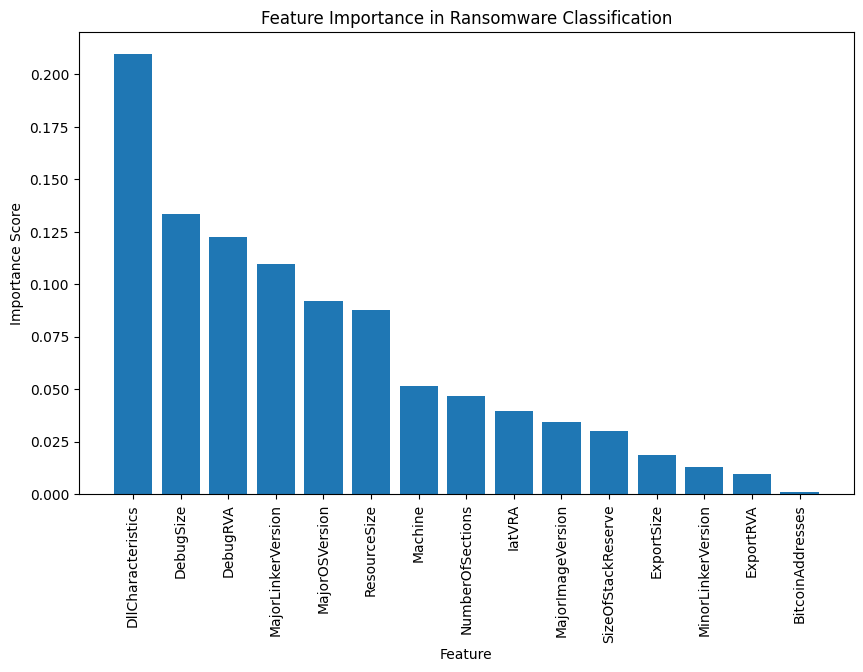

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance in Ransomware Classification")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
num_features = 10
selected_features = X_train.columns[np.argsort(importances)[-num_features:]]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9965591742018084

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      1.00      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



In [ ]:
import joblib

joblib.dump(model, "ransomware_detector.pkl")

['ransomware_detector.pkl']

In [ ]:
model = joblib.load("ransomware_detector.pkl")

In [ ]:
print(X_train.shape[1])

15


In [ ]:
print(X_train.columns)

Index(['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion',
       'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections',
       'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize',
       'BitcoinAddresses'],
      dtype='object')


In [ ]:
X_new = X_test.iloc[[0]]

In [ ]:
print(X_new.columns)

Index(['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion',
       'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections',
       'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize',
       'BitcoinAddresses'],
      dtype='object')


In [ ]:
import pandas as pd

new_values = [0.5, 0.2, 1.0, 0.3, 0.6, 0.7, 0.1, 0.9, 0.4, 0.8, 0.25, 0.35, 0.45, 0.55, 0.65]

feature_names = X_train.columns

X_new = pd.DataFrame([new_values], columns=feature_names)

In [ ]:
X_new = X_new[X_train.columns]

In [ ]:
X_new = X_new.astype(np.int64)

In [ ]:
X_new = X_new[X_train.columns]

In [ ]:
X_new = X_new[model.feature_names_in_]

prediction = model.predict(X_new)
print("Prediction:", prediction)

Prediction: [0]


In [ ]:
confidence = model.predict_proba(X_new)
print("Prediction Confidence:", confidence)

Prediction Confidence: [[0.98 0.02]]
